In [1]:
import pandas as pd
import numpy as np
import json, re
import datetime
import time

In [2]:
spy_data = pd.read_csv('clean_spy_data.csv')

spy_data

,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time
0,288908,f10c3152,2023-03-17T13:49:01.7960000Z,2023-03-17T13:49:15.073Z,executed,levels/collaborateur/niveau03,NaN,NaN
1,288914,f10c3152,2023-03-17T13:48:57.6240000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
2,288930,f10c3152,2023-03-17T13:48:48.9860000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
3,288945,f10c3152,2023-03-17T13:48:41.1910000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
4,289002,f10c3152,2023-03-17T13:48:10.5390000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
...,...,...,...,...,...,...,...,...
327396,201753,103D4EAB,2023-05-25T07:26:02.1560000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN
327397,201785,103D4EAB,2023-05-25T07:25:52.1960000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN
327398,201823,103D4EAB,2023-05-25T07:25:42.6570000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN
327399,201833,103D4EAB,2023-05-25T07:25:39.6780000Z,2023-05-25T07:23:31.166Z,opened,levels/tutoriel/tutoriel,NaN,NaN


In [3]:
# Get the actor who has the longest time and convert the time in the format 'HH:MM:SS'
print('Longest time: ')
display(spy_data[spy_data['time'] == spy_data['time'].max()]['time'].apply(lambda x: str(datetime.timedelta(seconds=x))))
# Display the actor
display(spy_data[spy_data['time'] == spy_data['time'].max()]['actor'])

print('----------------------------------------')

# Get the actor who has the shortest time and convert the time in the format 'HH:MM:SS'
print('Shortest time: ')
display(spy_data[spy_data['time'] == spy_data['time'].min()]['time'].apply(lambda x: str(datetime.timedelta(seconds=x))))

Longest time: 


58091    1 day, 17:43:33.291000
Name: time, dtype: object

58091    D4039AEB
Name: actor, dtype: object

----------------------------------------
Shortest time: 


16877    0:00:00.215000
Name: time, dtype: object

In [4]:
# Get the mean time by selecting the completed verbs and store it in a variable
print('Mean time: ')
mean_time = spy_data[spy_data['verb'] == 'completed']['time'].mean()

seconds_to_format = lambda seconds: time.strftime('%Hh %Mmin %Ssec', time.gmtime(seconds))

seconds_to_format(mean_time)

Mean time: 


'00h 01min 20sec'

In [5]:
# Get the median time by selecting the completed verbs and store it in a variable
print('Median time: ')
median_time = spy_data[spy_data['verb'] == 'completed']['time'].median()

print(seconds_to_format(median_time))

print('----------------------------------------')

# Get the standard deviation time by selecting the completed verbs and store it in a variable
print('Standard deviation time: ')
std_time = spy_data[spy_data['verb'] == 'completed']['time'].std()

print(seconds_to_format(std_time))

print('----------------------------------------')

# Get the variance time by selecting the completed verbs and store it in a variable
print('Variance time: ')
var_time = spy_data[spy_data['verb'] == 'completed']['time'].var()

print(seconds_to_format(var_time))

print('----------------------------------------')

# Get the 25th percentile time by selecting the completed verbs and store it in a variable
print('25th percentile time: ')
percentile_25 = spy_data[spy_data['verb'] == 'completed']['time'].quantile(0.25)

print(seconds_to_format(percentile_25))

print('----------------------------------------')

# Get the 50th percentile time by selecting the completed verbs and store it in a variable
print('50th percentile time: ')
percentile_50 = spy_data[spy_data['verb'] == 'completed']['time'].quantile(0.5)

print(seconds_to_format(percentile_50))

print('----------------------------------------')

# Get the 75th percentile time by selecting the completed verbs and store it in a variable
print('75th percentile time: ')
percentile_75 = spy_data[spy_data['verb'] == 'completed']['time'].quantile(0.75)

print(seconds_to_format(percentile_75))

Median time: 
00h 00min 49sec
----------------------------------------
Standard deviation time: 
00h 18min 15sec
----------------------------------------
Variance time: 
21h 25min 29sec
----------------------------------------
25th percentile time: 
00h 00min 27sec
----------------------------------------
50th percentile time: 
00h 00min 49sec
----------------------------------------
75th percentile time: 
00h 01min 28sec


In [6]:
# Get a list of the 1% of the fastest actors
print('----------------------------------------')
print('Fastest actors: ')
fastest_actors = spy_data[spy_data['verb'] == 'completed'].sort_values(by='time').head(int(len(spy_data[spy_data['verb'] == 'completed'])*0.01))['actor'].tolist()

len(fastest_actors)

----------------------------------------
Fastest actors: 


189

----------------------------------------
Classes: 


<AxesSubplot: >

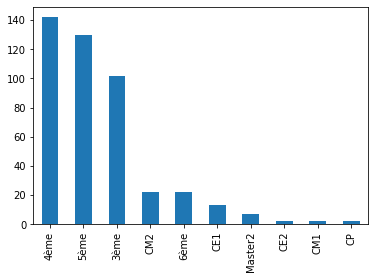

In [7]:
 # Load the spy_profile.csv file
spy_profile = pd.read_csv('profiles.csv')

student_classes = [obj.__str__() for obj in spy_profile['predicted_class'].tolist()]

# Ploting the classes
print('----------------------------------------')
print('Classes: ')
pd.Series(student_classes).value_counts().plot(kind='bar')

In [8]:
# Get rid of actors which are not in the spy_profile.csv file and store the result in a variable
print('----------------------------------------')
print('Actors in the spy_profile.csv file: ')
spy_data_real = spy_data[spy_data['actor'].isin(spy_profile['ID'].tolist())]

----------------------------------------
Actors in the spy_profile.csv file: 


In [9]:
# Merge the spy_data_real and spy_profile dataframes
print('----------------------------------------')
print('Merged dataframes: ')
merged_data = pd.merge(spy_data_real, spy_profile, left_on='actor', right_on='ID')

merged_data

----------------------------------------
Merged dataframes: 


,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time,ID,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,93666,FEDB8DB7,2023-06-05T12:58:22.9100000Z,2023-06-05T14:03:32.527Z,completed,levels/repetiteur/niveau07,True,52.51,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
1,93668,FEDB8DB7,2023-06-05T12:58:09.6130000Z,2023-06-05T14:03:32.527Z,executed,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
2,93669,FEDB8DB7,2023-06-05T12:58:07.4590000Z,2023-06-05T14:03:32.527Z,deleted,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
3,93670,FEDB8DB7,2023-06-05T12:58:07.3850000Z,2023-06-05T14:03:32.527Z,modified,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
4,93678,FEDB8DB7,2023-06-05T12:57:30.4000000Z,2023-06-05T14:03:32.527Z,launched,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263144,201753,103D4EAB,2023-05-25T07:26:02.1560000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263145,201785,103D4EAB,2023-05-25T07:25:52.1960000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263146,201823,103D4EAB,2023-05-25T07:25:42.6570000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263147,201833,103D4EAB,2023-05-25T07:25:39.6780000Z,2023-05-25T07:23:31.166Z,opened,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32


In [10]:
# Drop the ID column and Unnamed: 0 column
merged_data = merged_data.drop(['ID', 'Unnamed: 0'], axis=1)

merged_data

,actor,timestamp,stored,verb,levels,result,time,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,FEDB8DB7,2023-06-05T12:58:22.9100000Z,2023-06-05T14:03:32.527Z,completed,levels/repetiteur/niveau07,True,52.51,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
1,FEDB8DB7,2023-06-05T12:58:09.6130000Z,2023-06-05T14:03:32.527Z,executed,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
2,FEDB8DB7,2023-06-05T12:58:07.4590000Z,2023-06-05T14:03:32.527Z,deleted,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
3,FEDB8DB7,2023-06-05T12:58:07.3850000Z,2023-06-05T14:03:32.527Z,modified,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
4,FEDB8DB7,2023-06-05T12:57:30.4000000Z,2023-06-05T14:03:32.527Z,launched,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263144,103D4EAB,2023-05-25T07:26:02.1560000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263145,103D4EAB,2023-05-25T07:25:52.1960000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263146,103D4EAB,2023-05-25T07:25:42.6570000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263147,103D4EAB,2023-05-25T07:25:39.6780000Z,2023-05-25T07:23:31.166Z,opened,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32


In [14]:
# For each actor, get the number of completed verbs and store the result in a variable
completed_verbs = merged_data[merged_data['verb'] == 'completed']['actor'].value_counts()

completed_verbs

96DD66C9    156
FC5E2940    134
FC5E2A23    124
59B6B585    120
A2592CC9    117
           ... 
52FE13BB      2
979A87BA      2
99B05706      1
D6EDED9       1
532ED412      1
Name: actor, Length: 433, dtype: int64